In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
file_path = '/content/drive/My Drive/diabetes_data.csv'
data = pd.read_csv(file_path)

In [ ]:

print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
summary_stats = data.describe()
print("\nSummary statistics:")
print(summary_stats)


Summary statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

In [ ]:
additional_file_path = '/content/drive/My Drive/diabetes_additional_data.csv'
df_additional = pd.read_csv(additional_file_path)

In [ ]:
print("First 5 rows of the additional dataset:")
print(df_additional.head())

print("\nAdditional Dataset Information:")
print(df_additional.info())

print("\nAdditional Dataset Summary Statistics:")
print(df_additional.describe())


First 5 rows of the additional dataset:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Additional Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
print("\nNumber of outliers in each column:")
print(outliers.sum())


Number of outliers in each column:
Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('Outcome', axis=1))
scaled_df = pd.DataFrame(scaled_data, columns=data.columns[:-1])

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1


outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
print(outliers.sum())

Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


In [ ]:
scaled_df['Outcome'] = data['Outcome']


Displaying histograms for each feature:


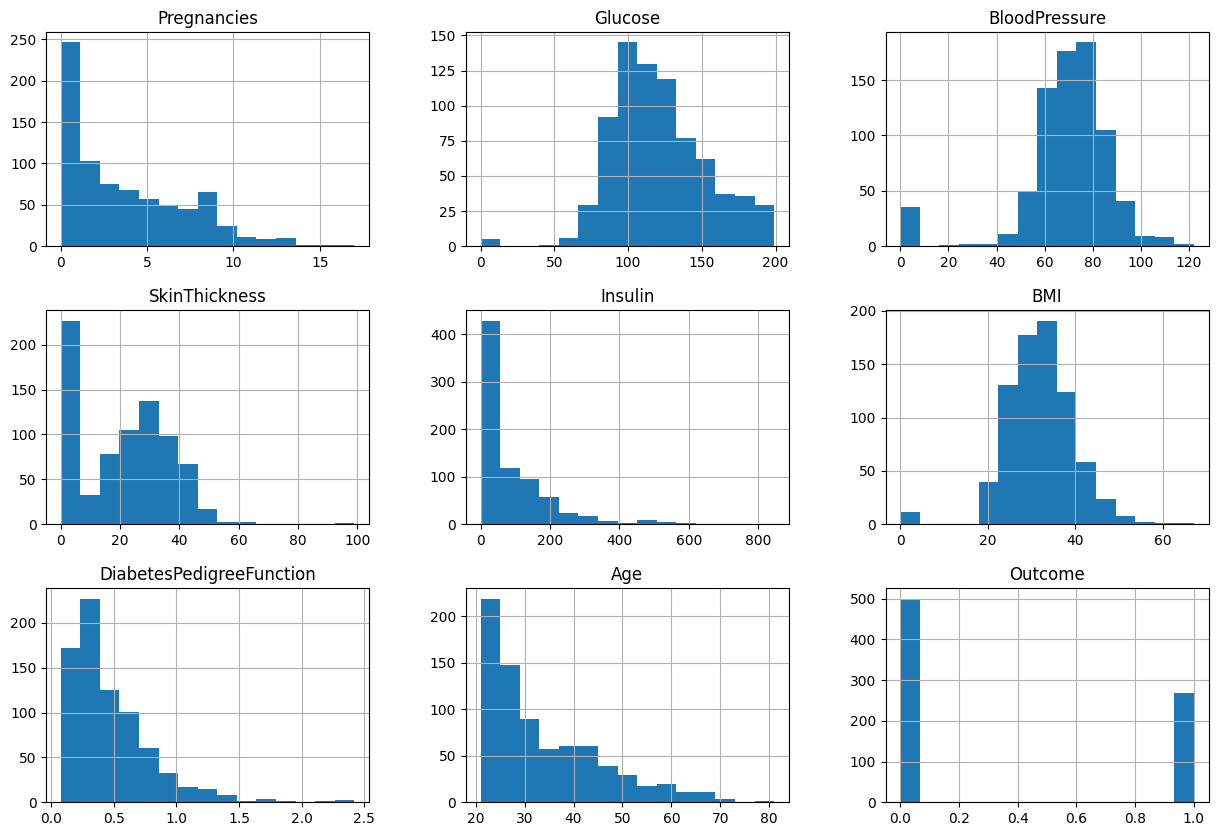

In [ ]:
print("\nDisplaying histograms for each feature:")
data.hist(bins=15, figsize=(15, 10))
plt.show()


Displaying box plots for each feature:


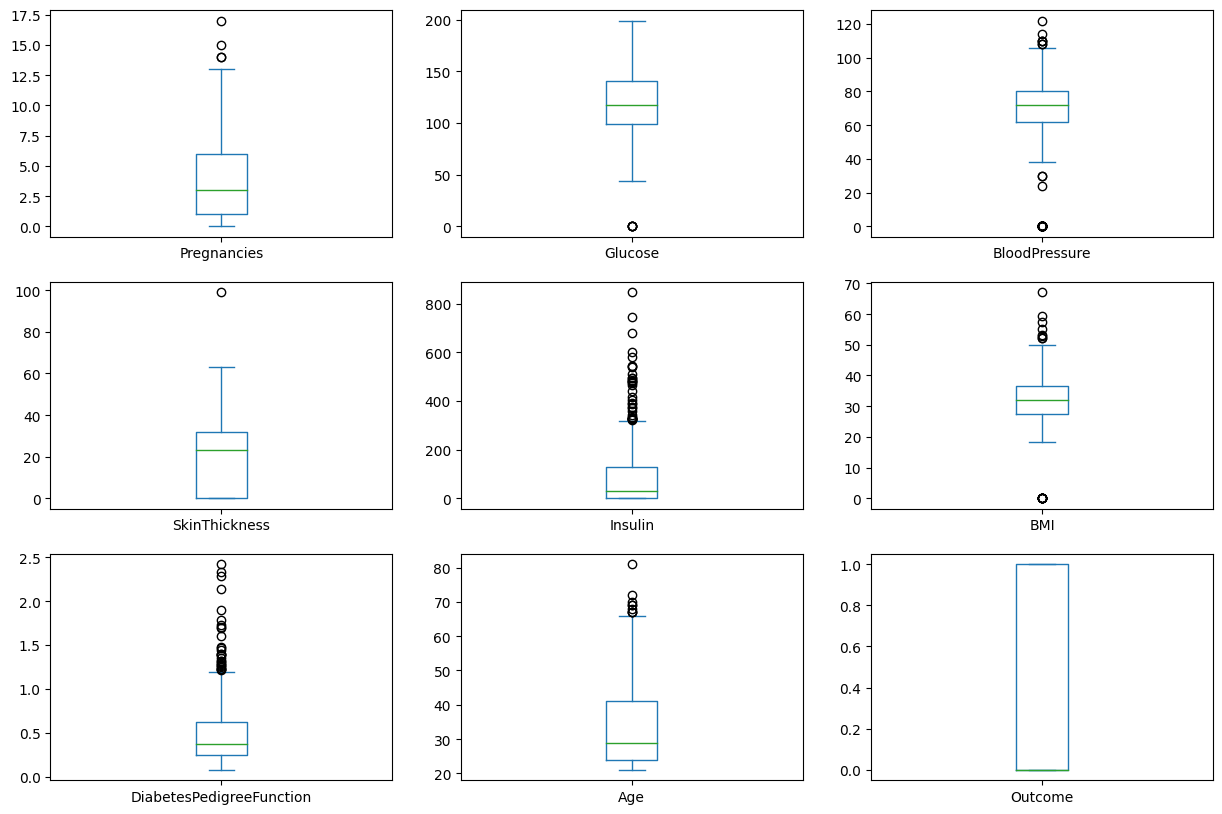

In [ ]:
print("\nDisplaying box plots for each feature:")
data.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.show()


In [ ]:
print("\nData types of each column:")
print(data.dtypes)



Data types of each column:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object



Displaying distribution plot for 'Pregnancies':


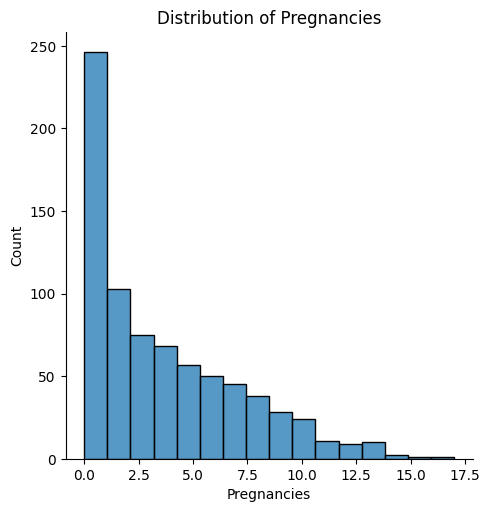

In [ ]:
print("\nDisplaying distribution plot for 'Pregnancies':")
sns.displot(data["Pregnancies"])
plt.title("Distribution of Pregnancies")
plt.show()


In [ ]:
correlation = data["Age"].corr(data["BMI"])
print(f"\nCorrelation between Age and BMI: {correlation}")


Correlation between Age and BMI: 0.03624187009229416
